In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)

In [8]:
y_train_hot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D

In [13]:
in_layer = Input(shape=[28, 28])
reshape = Reshape([28, 28, 1])(in_layer)
c1 = Conv2D(16, 3, activation="relu")(reshape)
m1 = MaxPooling2D(2)(c1)
c2 = Conv2D(32, 3, activation="relu")(m1)
m2 = MaxPooling2D(2)(c2)
flat = Flatten()(m2)
d1 = Dense(500, activation="relu")(flat)
d2 = Dense(200, activation="relu")(d1)
d3 = Dense(50, activation="relu")(d2)
out_layer = Dense(10, activation="softmax")(d3)

In [14]:
model = Model(in_layer, out_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0     

In [16]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.fit(x_train, y_train_hot, batch_size=600, epochs=10)

Epoch 1/10
100/100 [==============================] - 16s 158ms/step - loss: 2.5186 - accuracy: 0.7591
Epoch 2/10
100/100 [==============================] - 15s 151ms/step - loss: 0.1104 - accuracy: 0.9678
Epoch 3/10
100/100 [==============================] - 15s 153ms/step - loss: 0.0660 - accuracy: 0.9803
Epoch 4/10
100/100 [==============================] - 16s 159ms/step - loss: 0.0461 - accuracy: 0.9861
Epoch 5/10
100/100 [==============================] - 16s 162ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 6/10
100/100 [==============================] - 17s 175ms/step - loss: 0.0254 - accuracy: 0.9924
Epoch 7/10
100/100 [==============================] - 18s 176ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 8/10
100/100 [==============================] - 17s 172ms/step - loss: 0.0147 - accuracy: 0.9957
Epoch 9/10
100/100 [==============================] - 17s 169ms/step - loss: 0.0107 - accuracy: 0.9971
Epoch 10/10
100/100 [==============================] - 19s 190ms/step - l

In [18]:
model.evaluate(x_test, y_test_hot, verbose=0)

[0.04734571650624275, 0.988099992275238]

[5]


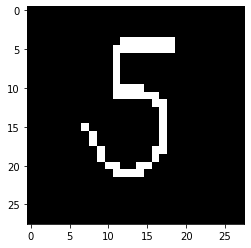

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../data/five.png")
small = cv2.resize(img, [28, 28])
gray = small.mean(axis=2)

gray = (gray > 100).astype(int) * 255

output = model.predict(np.array([gray]))

print(output.argmax(axis=1))

plt.imshow(gray, cmap="gray")